#Problem
>Using a dataset of properties and house prices for each house, a machine learning project on the prices of different types of houses is intended to be realised.

#Dataset Description
- `MSSubClass:` Identifies the type of dwelling involved in the sale.

- `MSZoning:` Identifies the general zoning classification of the sale.

- `LotFrontage:` Linear feet of street connected to property

- `LotArea:` Lot size in square feet

- `Street:` Type of road access to property

- `Alley:` Type of alley access to property

- `LotShape:` General shape of property

- `LandContour:` Flatness of the property

- `Utilities:` Type of utilities available

- `LotConfig:` Lot configuration

- `LandSlope:` Slope of property

- `Neighborhood`: Physical locations within Ames city limits

- `Condition1:` Proximity to various conditions

- `Condition2:` Proximity to various conditions (if more than one is present)

- `BldgType:` Type of dwelling

- `HouseStyle:` Style of dwelling

- `OverallQual:` Rates the overall material and finish of the house

- `OverallCond:` Rates the overall condition of the house

- `YearBuilt:` Original construction date

- `YearRemodAdd:` Remodel date (same as construction date if no remodeling or additions)

- `RoofStyle:` Type of roof

- `RoofMatl:` Roof material

- `Exterior1st:` Exterior covering on house

- `Exterior2nd:` Exterior covering on house (if more than one material)

- `MasVnrType:` Masonry veneer type

- `MasVnrArea:` Masonry veneer area in square feet

- `ExterQual:` Evaluates the quality of the material on the exterior

- `ExterCond:` Evaluates the present condition of the material on the exterior

- `Foundation:` Type of foundation

- `BsmtQual:` Evaluates the height of the basement

- `BsmtCond:` Evaluates the general condition of the basement

- `BsmtExposure:` Refers to walkout or garden level walls

- `BsmtFinType1:` Rating of basement finished area

- `BsmtFinSF1:` Type 1 finished square feet

- `BsmtFinType2:` Rating of basement finished area (if multiple types)

- `BsmtFinSF2:` Type 2 finished square feet

- `BsmtUnfSF:` Unfinished square feet of basement area

- `TotalBsmtSF:` Total square feet of basement area

- `Heating:` Type of heating

- `HeatingQC:` Heating quality and condition

- `CentralAir:` Central air conditioning

- `Electrical:` Electrical system

- `1stFlrSF:` First Floor square feet

- `2ndFlrSF:` Second floor square feet

- `LowQualFinSF:` Low quality finished square feet (all floors)

- `GrLivArea:` Above grade (ground) living area square feet

- `BsmtFullBath:` Basement full bathrooms

- `BsmtHalfBath:` Basement half bathrooms

- `FullBath:` Full bathrooms above grade

- `HalfBath:` Half baths above grade

- `Bedroom:` Bedrooms above grade (does NOT include basement bedrooms)

- `Kitchen:` Kitchens above grade

- `KitchenQual:` Kitchen quality

- `TotRmsAbvGrd:` Total rooms above grade (does not include bathrooms)

- `Functional:` Home functionality (Assume typical unless deductions are warranted)

- `Fireplaces:` Number of fireplaces

- `FireplaceQu:` Fireplace quality

- `GarageType:` Garage location

- `GarageYrBlt:` Year garage was built

- `GarageFinish:` Interior finish of the garage

- `GarageCars:` Size of garage in car capacity

- `GarageArea:` Size of garage in square feet

- `GarageQual:` Garage quality

- `GarageCond:` Garage condition

- `PavedDrive:` Paved driveway

- `WoodDeckSF:` Wood deck area in square feet

- `OpenPorchSF:` Open porch area in square feet

- `EnclosedPorch:` Enclosed porch area in square feet

- `3SsnPorch:` Three season porch area in square feet

- `ScreenPorch:` Screen porch area in square feet

- `PoolArea:` Pool area in square feet

- `PoolQC:` Pool quality

- `Fence:` Fence quality

- `MiscFeature:` Miscellaneous feature not covered in other categories

- `MiscVal:` $Value of miscellaneous feature

- `MoSold:` Month Sold (MM)

- `YrSold:` Year Sold (YYYY)

- `SaleType:` Type of sale

- `SaleCondition:` Condition of sale

#Introduction

In [ ]:
!pip install catboost

In [ ]:
import warnings
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV, validation_curve
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


pd.set_option("display.max_rows", None)
warnings.simplefilter(action='ignore', category=Warning)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

df = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#Overall Picture of Datasets

In [ ]:
def check_df(dataframe, head):
  print("----- SHAPE -----")
  print(dataframe.shape)
  print("\n----- DTYPES -----")
  print(dataframe.dtypes)
  print("\n----- HEAD -----")
  print(dataframe.head(head))
  print("\n----- TAIL -----")
  print(dataframe.tail(head))
  print("\n----- NA -----")
  print(dataframe.isnull().sum())
  print("\n----- QUANTILES -----")
  print(dataframe.describe([0, 0.25, 0.50, 0.75, 1]).T)
  print("\n----- UNIQUE -----")
  print(dataframe.nunique())

check_df(df, 5)

----- SHAPE -----
(1460, 81)

----- DTYPES -----
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
T

In [ ]:
check_df(test, 5)

----- SHAPE -----
(1459, 80)

----- DTYPES -----
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
T

In [ ]:
print(df.shape)
print(test.shape)

(1460, 81)
(1459, 80)


#Exploratory Data Analysis

>Test data is appended to train data to apply same pre-processing steps.

In [ ]:
df_total = df.append(test).reset_index(drop=True)
df_total.shape

(2919, 81)

>Nan written to test data's SalePrice.

In [ ]:
df_total.value_counts(np.where(df_total["SalePrice"] > 0, "1", "0"))

1    1460
0    1459
dtype: int64

>Capture the numerical and categorical variables

In [ ]:
def grab_col_names(dataframe, cat_th=18, car_th=20):

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df_total)

>Missing Data Analysis

<Axes: >

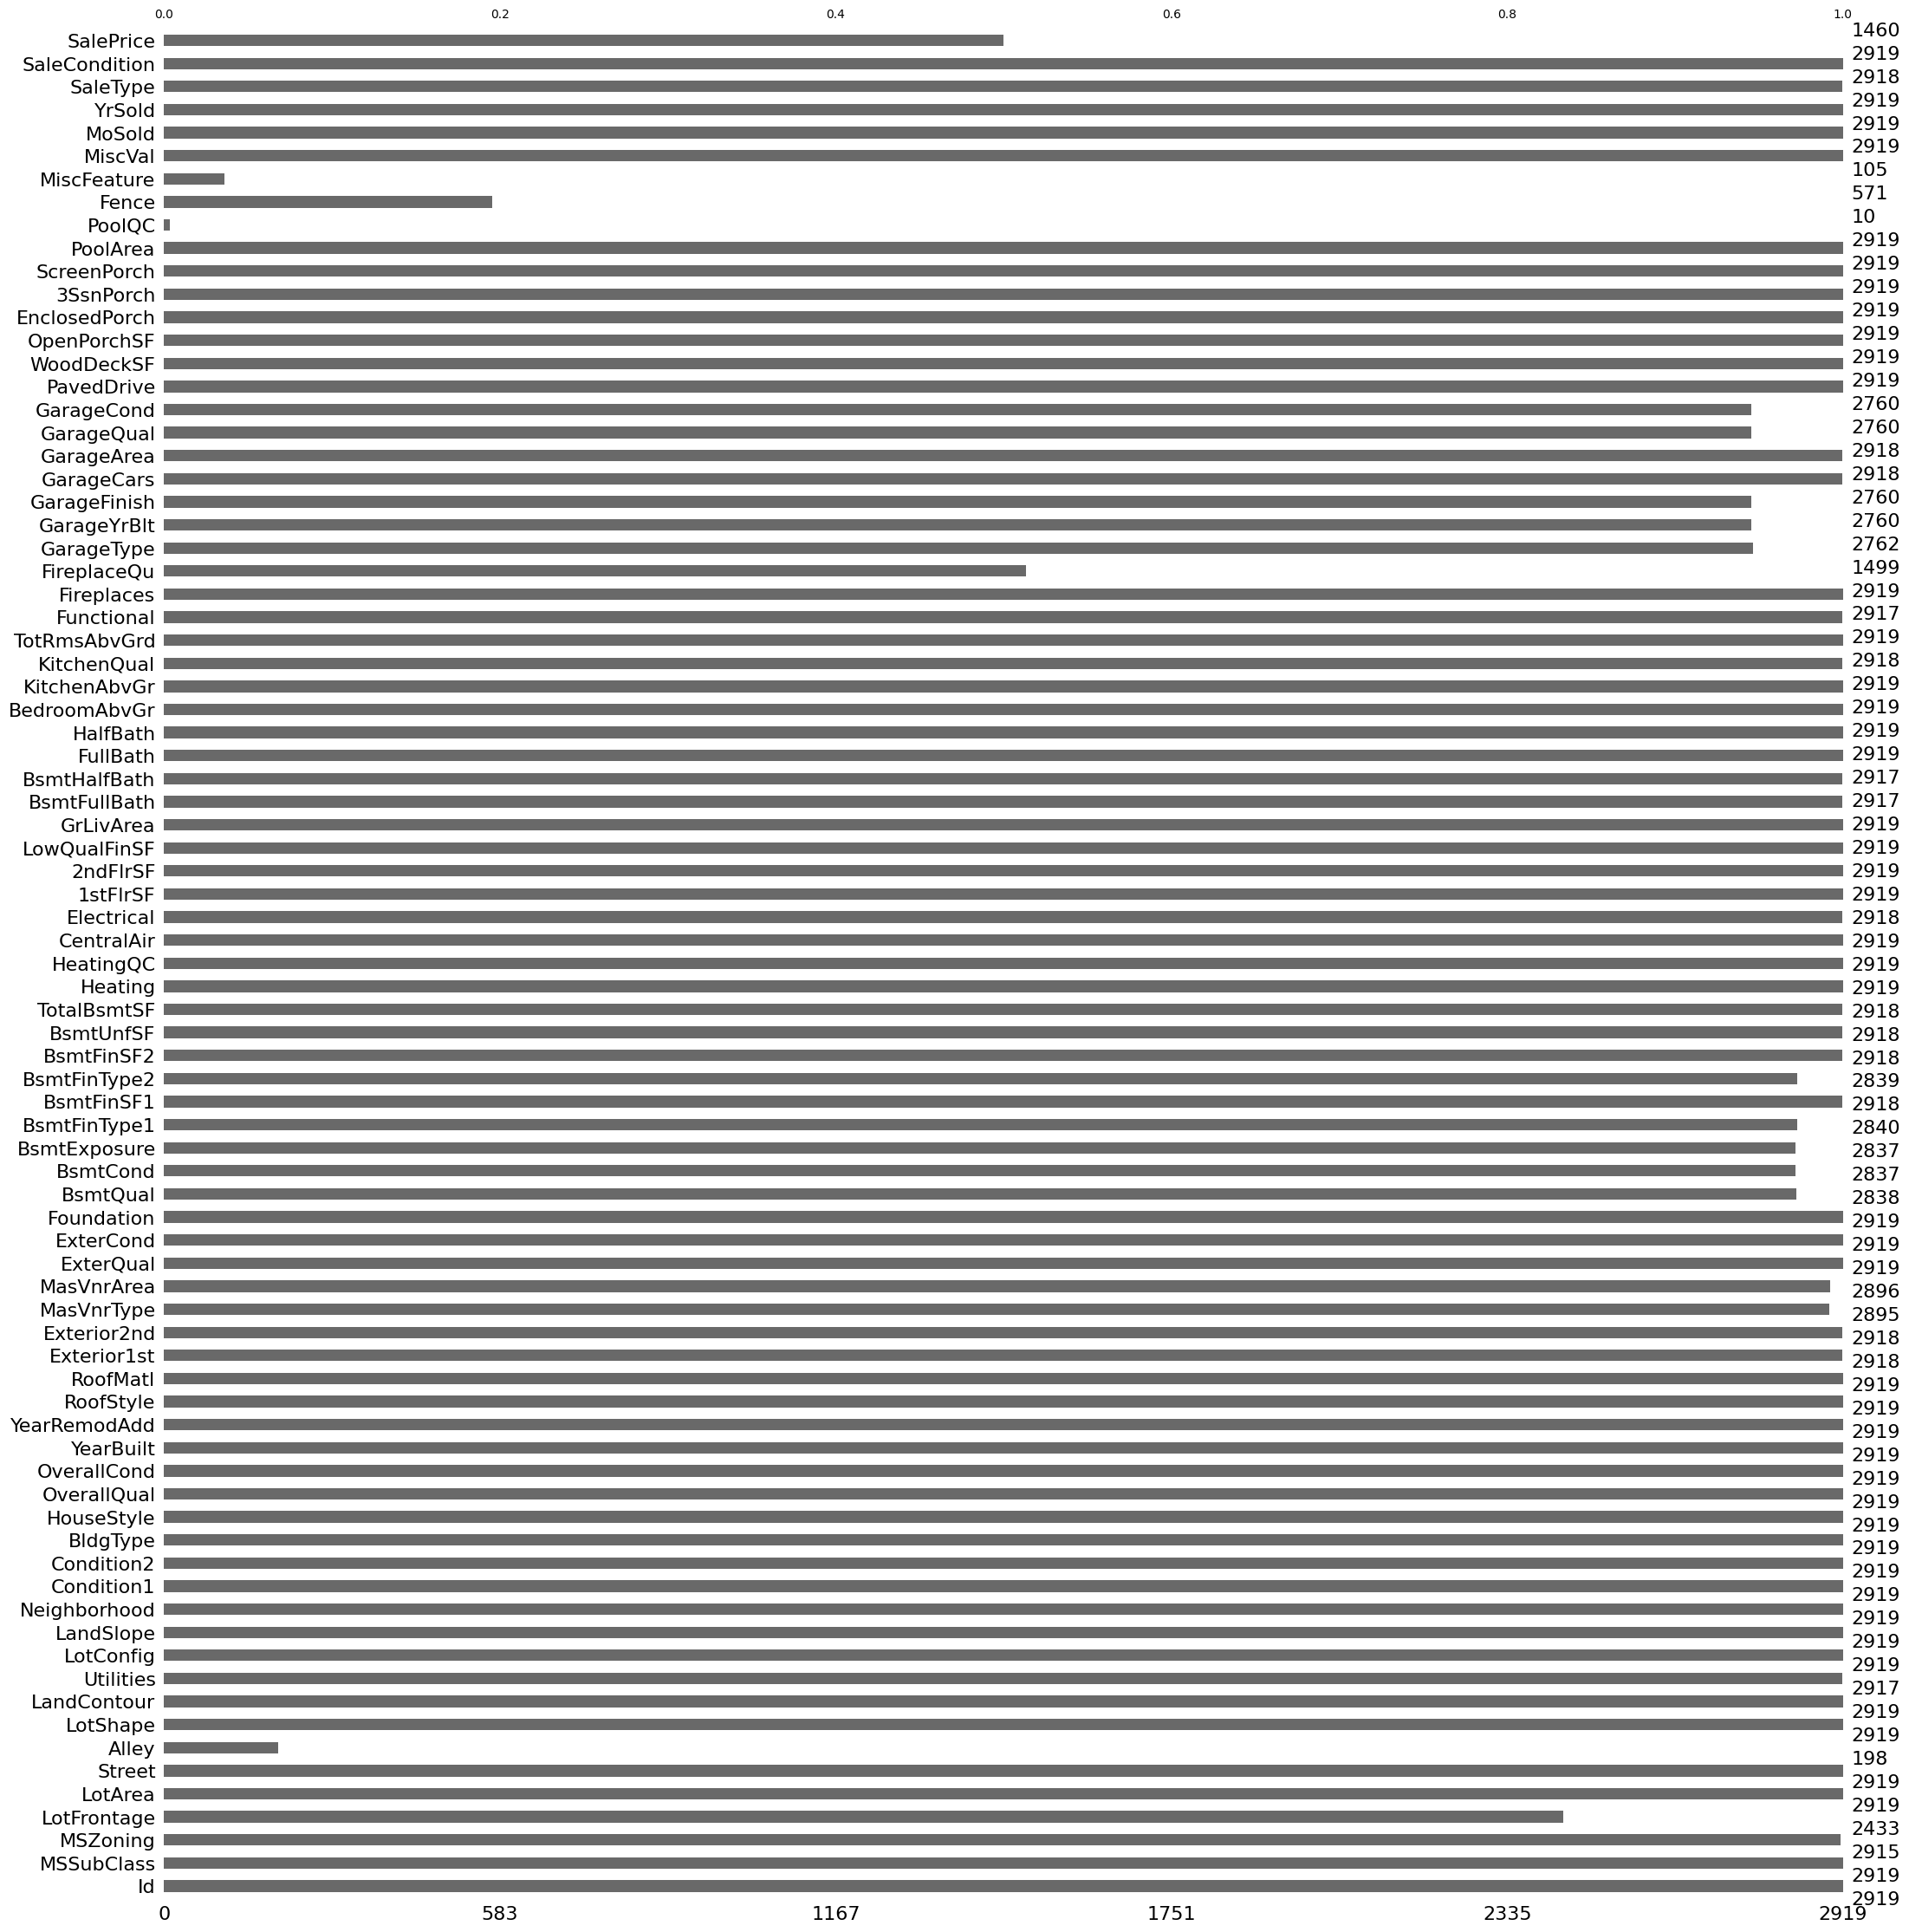

In [ ]:
msno.bar(df_total)

>Handling Missing Data

In [ ]:
### BOŞ DEĞER ANALİZİ VE ÖNLENMESİ

print(df_total.shape)
df_total.dropna(subset=["Electrical", "MasVnrArea", "MasVnrType", "MSZoning",
                  "Utilities", "Exterior1st", "Exterior2nd", "BsmtFullBath",
                  "BsmtHalfBath", "Functional", "SaleType"], inplace=True)
print(df_total.shape)

(2919, 81)
(2884, 81)


In [ ]:
zero_cols = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "GarageCars", "GarageArea", "GarageYrBlt"]

def fill_nan(cat_cols, fill, dataset):
  for col in cat_cols:
    dataset[col].fillna(fill, inplace=True)

fill_nan(zero_cols, 0, df_total)
fill_nan(cat_cols, "No", df_total)

#Feature Engineering

>Creating New Variables

In [ ]:
### YENİ DEĞİŞKENLER

df_total["NEW_1stGrLiv"] = (df_total["1stFlrSF"]*df_total["GrLivArea"])

df_total["NEW_GarageGrLiv"] = (df_total["GarageArea"]*df_total["GrLivArea"])

df_total["TotalQual"] = df_total[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1",
                      "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "Fence"]].sum(axis = 1)

df_total["TotalGarageQual"] = df_total[["GarageQual", "GarageCond"]].sum(axis = 1)

df_total["Overall"] = df_total[["OverallQual", "OverallCond"]].sum(axis = 1)

df_total["Exter"] = df_total[["ExterQual", "ExterCond"]].sum(axis = 1)

df_total["Qual"] = df_total[["OverallQual", "ExterQual", "GarageQual", "Fence", "BsmtFinType1", "BsmtFinType2", "KitchenQual", "FireplaceQu"]].sum(axis = 1)

df_total["Cond"] = df_total[["OverallCond", "ExterCond", "GarageCond", "BsmtCond", "HeatingQC", "Functional"]].sum(axis = 1)

# Total Floor
df_total["NEW_TotalFlrSF"] = df_total["1stFlrSF"] + df_total["2ndFlrSF"]

# Total Finished Basement Area
df_total["NEW_TotalBsmtFin"] = df_total.BsmtFinSF1 + df_total.BsmtFinSF2

# Porch Area
df_total["NEW_PorchArea"] = df_total.OpenPorchSF + df_total.EnclosedPorch + df_total.ScreenPorch + df_total["3SsnPorch"] + df_total.WoodDeckSF

# Total House Area
df_total["NEW_TotalHouseArea"] = df_total.NEW_TotalFlrSF + df_total.TotalBsmtSF

df_total["NEW_TotalSqFeet"] = df_total.GrLivArea + df_total.TotalBsmtSF

df_total["NEW_TotalFullBath"] = df_total.BsmtFullBath + df_total.FullBath
df_total["NEW_TotalHalfBath"] = df_total.BsmtHalfBath + df_total.HalfBath

df_total["NEW_TotalBath"] = df_total["NEW_TotalFullBath"] + (df_total["NEW_TotalHalfBath"]*0.5)

#Lot Area
New_LotArea = pd.Series(["Studio", "Small", "Middle", "Large", "Dublex", "Luxury"], dtype="category")
df["New_LotArea"] = New_LotArea
df.loc[(df["LotArea"] <= 2000), "New_LotArea"] = New_LotArea[0]
df.loc[(df["LotArea"] > 2000) & (df["LotArea"] <= 4000), "New_LotArea"] = New_LotArea[1]
df.loc[(df["LotArea"] > 4000) & (df["LotArea"] <= 6000), "New_LotArea"] = New_LotArea[2]
df.loc[(df["LotArea"] > 6000) & (df["LotArea"] <= 8000), "New_LotArea"] = New_LotArea[3]
df.loc[(df["LotArea"] > 10000) & (df["LotArea"] <= 12000), "New_LotArea"] = New_LotArea[4]
df.loc[df["LotArea"] > 12000, "New_LotArea"] = New_LotArea[5]

# Lot Ratio
df_total["NEW_LotRatio"] = df_total.GrLivArea / df_total.LotArea

df_total["NEW_RatioArea"] = df_total.NEW_TotalHouseArea / df_total.LotArea

df_total["NEW_GarageLotRatio"] = df_total.GarageArea / df_total.LotArea

# MasVnrArea
df_total["NEW_MasVnrRatio"] = df_total.MasVnrArea / df_total.NEW_TotalHouseArea

# Dif Area
df_total["NEW_DifArea"] = (df_total.LotArea - df_total["1stFlrSF"] - df_total.GarageArea - df_total.NEW_PorchArea - df_total.WoodDeckSF)

# LowQualFinSF
df_total["NEW_LowQualFinSFRatio"] = df_total.LowQualFinSF / df_total.NEW_TotalHouseArea

df_total["NEW_OverallGrade"] = df_total["OverallQual"] * df_total["OverallCond"]

# Overall kitchen score
df_total["NEW_KitchenScore"] = df_total["KitchenAbvGr"] * df_total["KitchenQual"]
# Overall fireplace score
df_total["NEW_FireplaceScore"] = df_total["Fireplaces"] * df_total["FireplaceQu"]

df_total["NEW_Restoration"] = df_total.YearRemodAdd - df_total.YearBuilt

df_total["NEW_HouseAge"] = df_total.YrSold - df_total.YearBuilt

df_total["NEW_RestorationAge"] = df_total.YrSold - df_total.YearRemodAdd

df_total["NEW_GarageAge"] = df_total.GarageYrBlt - df_total.YearBuilt

df_total["NEW_GarageRestorationAge"] = np.abs(df_total.GarageYrBlt - df_total.YearRemodAdd)

df_total["NEW_GarageSold"] = df_total.YrSold - df_total.GarageYrBlt

cat_cols, num_cols, cat_but_car = grab_col_names(df_total)

Observations: 2884
Variables: 112
cat_cols: 68
num_cols: 43
cat_but_car: 1
num_but_cat: 22


In [ ]:
df_total.nunique()

Id                          2884
MSSubClass                    16
MSZoning                       5
LotFrontage                  127
LotArea                     1926
Street                         2
Alley                          3
LotShape                       4
LandContour                    4
Utilities                      2
LotConfig                      5
LandSlope                      3
Neighborhood                  25
Condition1                     9
Condition2                     8
BldgType                       5
HouseStyle                     8
OverallQual                   10
OverallCond                    9
YearBuilt                    118
YearRemodAdd                  61
RoofStyle                      6
RoofMatl                       8
Exterior1st                   15
Exterior2nd                   16
MasVnrType                     4
MasVnrArea                   444
ExterQual                      4
ExterCond                      5
Foundation                     6
BsmtQual  

###Encoding and Imputing

- Filling missing numeric columns except SalePrice because SalePrice is target variable that we have to predict.

- Applied Label Encoder to columns that have 2 unique categorical variables.

- Applied One Hot Hot Encoder to columns that have moren than 2 categorical variables.

- Filled missing numerical variables with KNNImputer.

In [ ]:
from sklearn import preprocessing

def label_encoder(dataframe, bin_col):
  le = preprocessing.LabelEncoder()
  dataframe[bin_col] = le.fit_transform(dataframe[bin_col])
  return dataframe

bin_cols = [col for col in df_total.columns if df_total[col].dtypes == "object" and
            len(df_total[col].unique()) == 2]

for bin_col in bin_cols:
  df_total = label_encoder(df_total, bin_col)

def one_hot_encoder(dataframe, cat_col, drop_first=True):
  dataframe = pd.get_dummies(dataframe, columns=cat_col, drop_first=drop_first)
  return dataframe

ohe_cols = [col for col in df_total.columns if df_total[col].dtypes in ["category", "object"] and
            len(df_total[col].unique()) > 2]
df_total = one_hot_encoder(df_total, ohe_cols)

n_cols = [col for col in num_cols if col != "SalePrice"]

mms = MinMaxScaler()
df_total[n_cols] = pd.DataFrame(mms.fit_transform(df_total[n_cols]))

imputer = KNNImputer(n_neighbors=5)
df_total[n_cols] = pd.DataFrame(imputer.fit_transform(df_total[n_cols]), columns=n_cols)
df_total[n_cols] = pd.DataFrame(mms.inverse_transform(df_total[n_cols]))


In [ ]:
df_total.isnull().sum()

Id                               67
MSSubClass                        0
LotFrontage                      67
LotArea                          67
Street                            0
Utilities                         0
OverallQual                       0
OverallCond                       0
YearBuilt                        67
YearRemodAdd                     67
MasVnrArea                       67
BsmtFinSF1                       67
BsmtFinSF2                       67
BsmtUnfSF                        67
TotalBsmtSF                      67
CentralAir                        0
1stFlrSF                         67
2ndFlrSF                         67
LowQualFinSF                     67
GrLivArea                        67
BsmtFullBath                      0
BsmtHalfBath                      0
FullBath                          0
HalfBath                          0
BedroomAbvGr                      0
KitchenAbvGr                      0
TotRmsAbvGrd                      0
Fireplaces                  

In [ ]:
num_except_sp = [col for col in df_total.columns if df_total[col].isnull().any() and col != "SalePrice"]

for na in num_except_sp:
  df_total.dropna(subset=na, inplace=True)

In [ ]:
df_total.isnull().sum()

Id                                0
MSSubClass                        0
LotFrontage                       0
LotArea                           0
Street                            0
Utilities                         0
OverallQual                       0
OverallCond                       0
YearBuilt                         0
YearRemodAdd                      0
MasVnrArea                        0
BsmtFinSF1                        0
BsmtFinSF2                        0
BsmtUnfSF                         0
TotalBsmtSF                       0
CentralAir                        0
1stFlrSF                          0
2ndFlrSF                          0
LowQualFinSF                      0
GrLivArea                         0
BsmtFullBath                      0
BsmtHalfBath                      0
FullBath                          0
HalfBath                          0
BedroomAbvGr                      0
KitchenAbvGr                      0
TotRmsAbvGrd                      0
Fireplaces                  

>Outlier Analysis

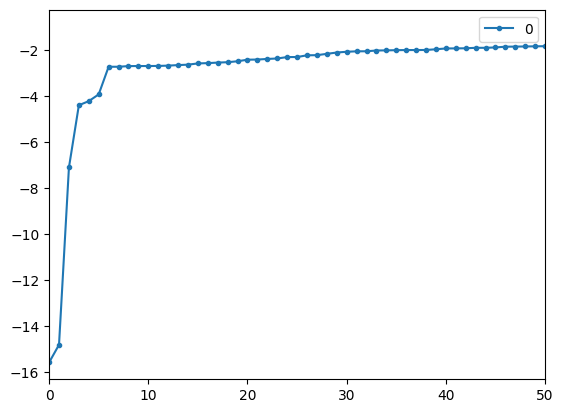

In [ ]:

numeric = df_total[n_cols]
lof = LocalOutlierFactor(n_neighbors=81)
lof.fit_predict(numeric)

df_scores = lof.negative_outlier_factor_
df_scores[0:5]
np.sort(df_scores)[0:5]

scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0,50], style='.-')
plt.show()

>Handling Outliers

In [ ]:
print(df_total.shape)
th = np.sort(df_scores)[6]
df_total.drop(axis=0, labels=df_total[df_scores < th].index, inplace=True)
print(df_total.shape)

(2817, 339)
(2811, 339)


#Modelling

>Splitting train and test datas.

In [ ]:
train_df = df_total[df_total["SalePrice"].notnull()]
test_df = df_total[df_total["SalePrice"].isnull()].drop("SalePrice", axis=1)

y = np.log1p(df_total[df_total['SalePrice'].notnull()]['SalePrice'])
X = train_df.drop(["Id", "SalePrice"], axis=1)

In [ ]:
train_df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,NEW_FireplaceScore_FaFa,NEW_FireplaceScore_FaFaFa,NEW_FireplaceScore_Gd,NEW_FireplaceScore_GdGd,NEW_FireplaceScore_GdGdGd,NEW_FireplaceScore_Po,NEW_FireplaceScore_TA,NEW_FireplaceScore_TATA,NEW_FireplaceScore_TATATA,NEW_FireplaceScore_TATATATA
0,1.00000,60,65.00000,8450.00000,1,0,7,5,2003.00000,2003.00000,...,0,0,0,0,0,0,0,0,0,0
1,2.00000,20,80.00000,9600.00000,1,0,6,8,1976.00000,1976.00000,...,0,0,0,0,0,0,1,0,0,0
2,3.00000,60,68.00000,11250.00000,1,0,7,5,2001.00000,2002.00000,...,0,0,0,0,0,0,1,0,0,0
3,4.00000,70,60.00000,9550.00000,1,0,7,5,1915.00000,1970.00000,...,0,0,1,0,0,0,0,0,0,0
4,5.00000,60,84.00000,14260.00000,1,0,8,5,2000.00000,2000.00000,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
test_df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,NEW_FireplaceScore_FaFa,NEW_FireplaceScore_FaFaFa,NEW_FireplaceScore_Gd,NEW_FireplaceScore_GdGd,NEW_FireplaceScore_GdGdGd,NEW_FireplaceScore_Po,NEW_FireplaceScore_TA,NEW_FireplaceScore_TATA,NEW_FireplaceScore_TATATA,NEW_FireplaceScore_TATATATA
1460,1488.00000,20,73.00000,8987.00000,1,0,5,6,2005.00000,2006.00000,...,0,0,0,0,0,0,0,0,0,0
1461,1489.00000,20,92.00000,9215.00000,1,0,6,6,2009.00000,2010.00000,...,0,0,0,0,0,0,0,0,0,0
1462,1490.00000,60,84.00000,10440.00000,1,0,5,5,2005.00000,2005.00000,...,0,0,0,0,0,0,1,0,0,0
1463,1491.00000,60,70.00000,11920.00000,1,0,6,6,2004.00000,2004.00000,...,0,0,1,0,0,0,0,0,0,0
1464,1492.00000,120,70.00000,9800.00000,1,0,8,5,1920.00000,1950.00000,...,0,0,0,0,0,0,0,0,0,0


- Initializing models and parameters.

- Creating models() function to train models without hyperparameters.

In [ ]:
### MODEL

models = {
      "LinearRegression": LinearRegression(),
      "RandomForest":  RandomForestRegressor(random_state=17),
      "GradientBoosting": GradientBoostingRegressor(random_state=17),
      "XGBoost": XGBRegressor(random_state=17, use_label_encoder=False),
      "LightGBM": LGBMRegressor(random_state=17, verbose=-1),
      "CatBoost": CatBoostRegressor(random_state=17, verbose=False)
}


params = {
    "RandomForest": {"max_depth": [3, 5, 8],
                     "max_features": ["auto", "sqrt", "log2"],
                     "min_samples_split": [2, 5, 10],
                     "n_estimators": [100, 200, 400, 700]
                     },
    "GradientBoosting": {"learning_rate": [0.01],
                         "max_depth": [3, 5, 8],
                         "max_features": ["auto", "sqrt", "log2"],
                         "n_estimators": [100, 200, 400, 700],
                         "subsample": [1, 0.8]
                         },
    "XGBoost": {"colsample_bytree": [1, 0.7],
                "learning_rate": [0.01],
                "max_depth": [3, 5, 8],
                "n_estimators": [100, 200, 400, 700],
                "subsample": [1, 0.8]},
    "LightGBM": {"colsample_bytree": [1, 0.7],
                 "learning_rate": [0.01],
                 "max_depth": [3, 5, 8],
                 "n_estimators": [100, 200, 400, 700],
                 "num_leaves": [3, 7]}
}

def model(models, X, y, test_size=0.2, cv=5):

  results = {}
  params = {}

  for i, (model_name, model) in enumerate(models.items()):

    params[model_name] = model.get_params()

    scoring = {
        "neg_mean_squared_error": make_scorer(mean_squared_error),
    }

    results[model_name] = {"RMSE": np.mean(np.sqrt(-cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")))}

  return results, params

>Plot Importance of features after tranining.

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(30, 30))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

In [ ]:
def model_info(models, X, y, test_size=0.2, random_state=17):

  results, params = model(models, X, y)
  results_df = pd.DataFrame(results).T

  print("\n")
  for i in params.items():
    print(i)

  return results_df

model_info(models, X, y)



('LinearRegression', {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False})
('RandomForest', {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 17, 'verbose': 0, 'warm_start': False})
('GradientBoosting', {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 17, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False})
('XGBoost', {'objective': 'r

,RMSE
LinearRegression,108677.10992
RandomForest,0.16837
GradientBoosting,0.15242
XGBoost,0.16423
LightGBM,0.15663
CatBoost,0.14809


>hyperparameter_tuning() function to train models with hyperparameters.

In [ ]:
def hyperparameter_tuning(models, params, X, y, cv=5, random_state=17):

  results = {}
  best_model = None
  best_score = 0

  for model_name, model in models.items():

    if model_name not in params:
      print(f"{model_name} does not require hyperparameters.")
      continue

    print(f"Performing Hyperparameter Tuning for {model_name}...")

    gs_cv = GridSearchCV(model, params[model_name], cv=cv, n_jobs=-1, verbose=False).fit(X, y)
    gs_final = model.set_params(**gs_cv.best_params_, random_state=random_state).fit(X, y)

    best_params = gs_cv.best_params_
    score = gs_cv.best_score_

    if score > best_score:
      best_score = score
      best_model = gs_final

    scoring = {
        "neg_mean_squared_error": make_scorer(mean_squared_error)
    }

    results[model_name] = {
            'Best Parameters': best_params,
            "RMSE": np.mean(np.sqrt(-cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")))
    }

    print(f"{model_name} - Best Parameters: ", best_params)

  return results, gs_final, best_model

>Compare validation and Training score of hyperparameters.

In [ ]:
def val_curve_params(model, X, y, param_name, param_range, scoring="neg_mean_squared_error", cv=10):
    if len(param_range) > 1:

      train_score, test_score = validation_curve(
          model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

      mean_train_score = np.mean(train_score, axis=1)
      mean_test_score = np.mean(test_score, axis=1)

      plt.plot(param_range, mean_train_score,
               label="Training Score", color='b')

      plt.plot(param_range, mean_test_score,
               label="Validation Score", color='g')

      plt.title(f"Validation Curve for {type(model).__name__}")
      plt.xlabel(f"Number of {param_name}")
      plt.ylabel(f"{scoring}")
      plt.tight_layout()
      plt.legend(loc='best')
      plt.show(block=True)

LinearRegression does not require hyperparameters.
Performing Hyperparameter Tuning for RandomForest...
RandomForest - Best Parameters:  {'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 400}
Performing Hyperparameter Tuning for GradientBoosting...
GradientBoosting - Best Parameters:  {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 700, 'subsample': 0.8}
Performing Hyperparameter Tuning for XGBoost...
XGBoost - Best Parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 700, 'subsample': 0.8}
Performing Hyperparameter Tuning for LightGBM...
LightGBM - Best Parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 700, 'num_leaves': 7}
CatBoost does not require hyperparameters.


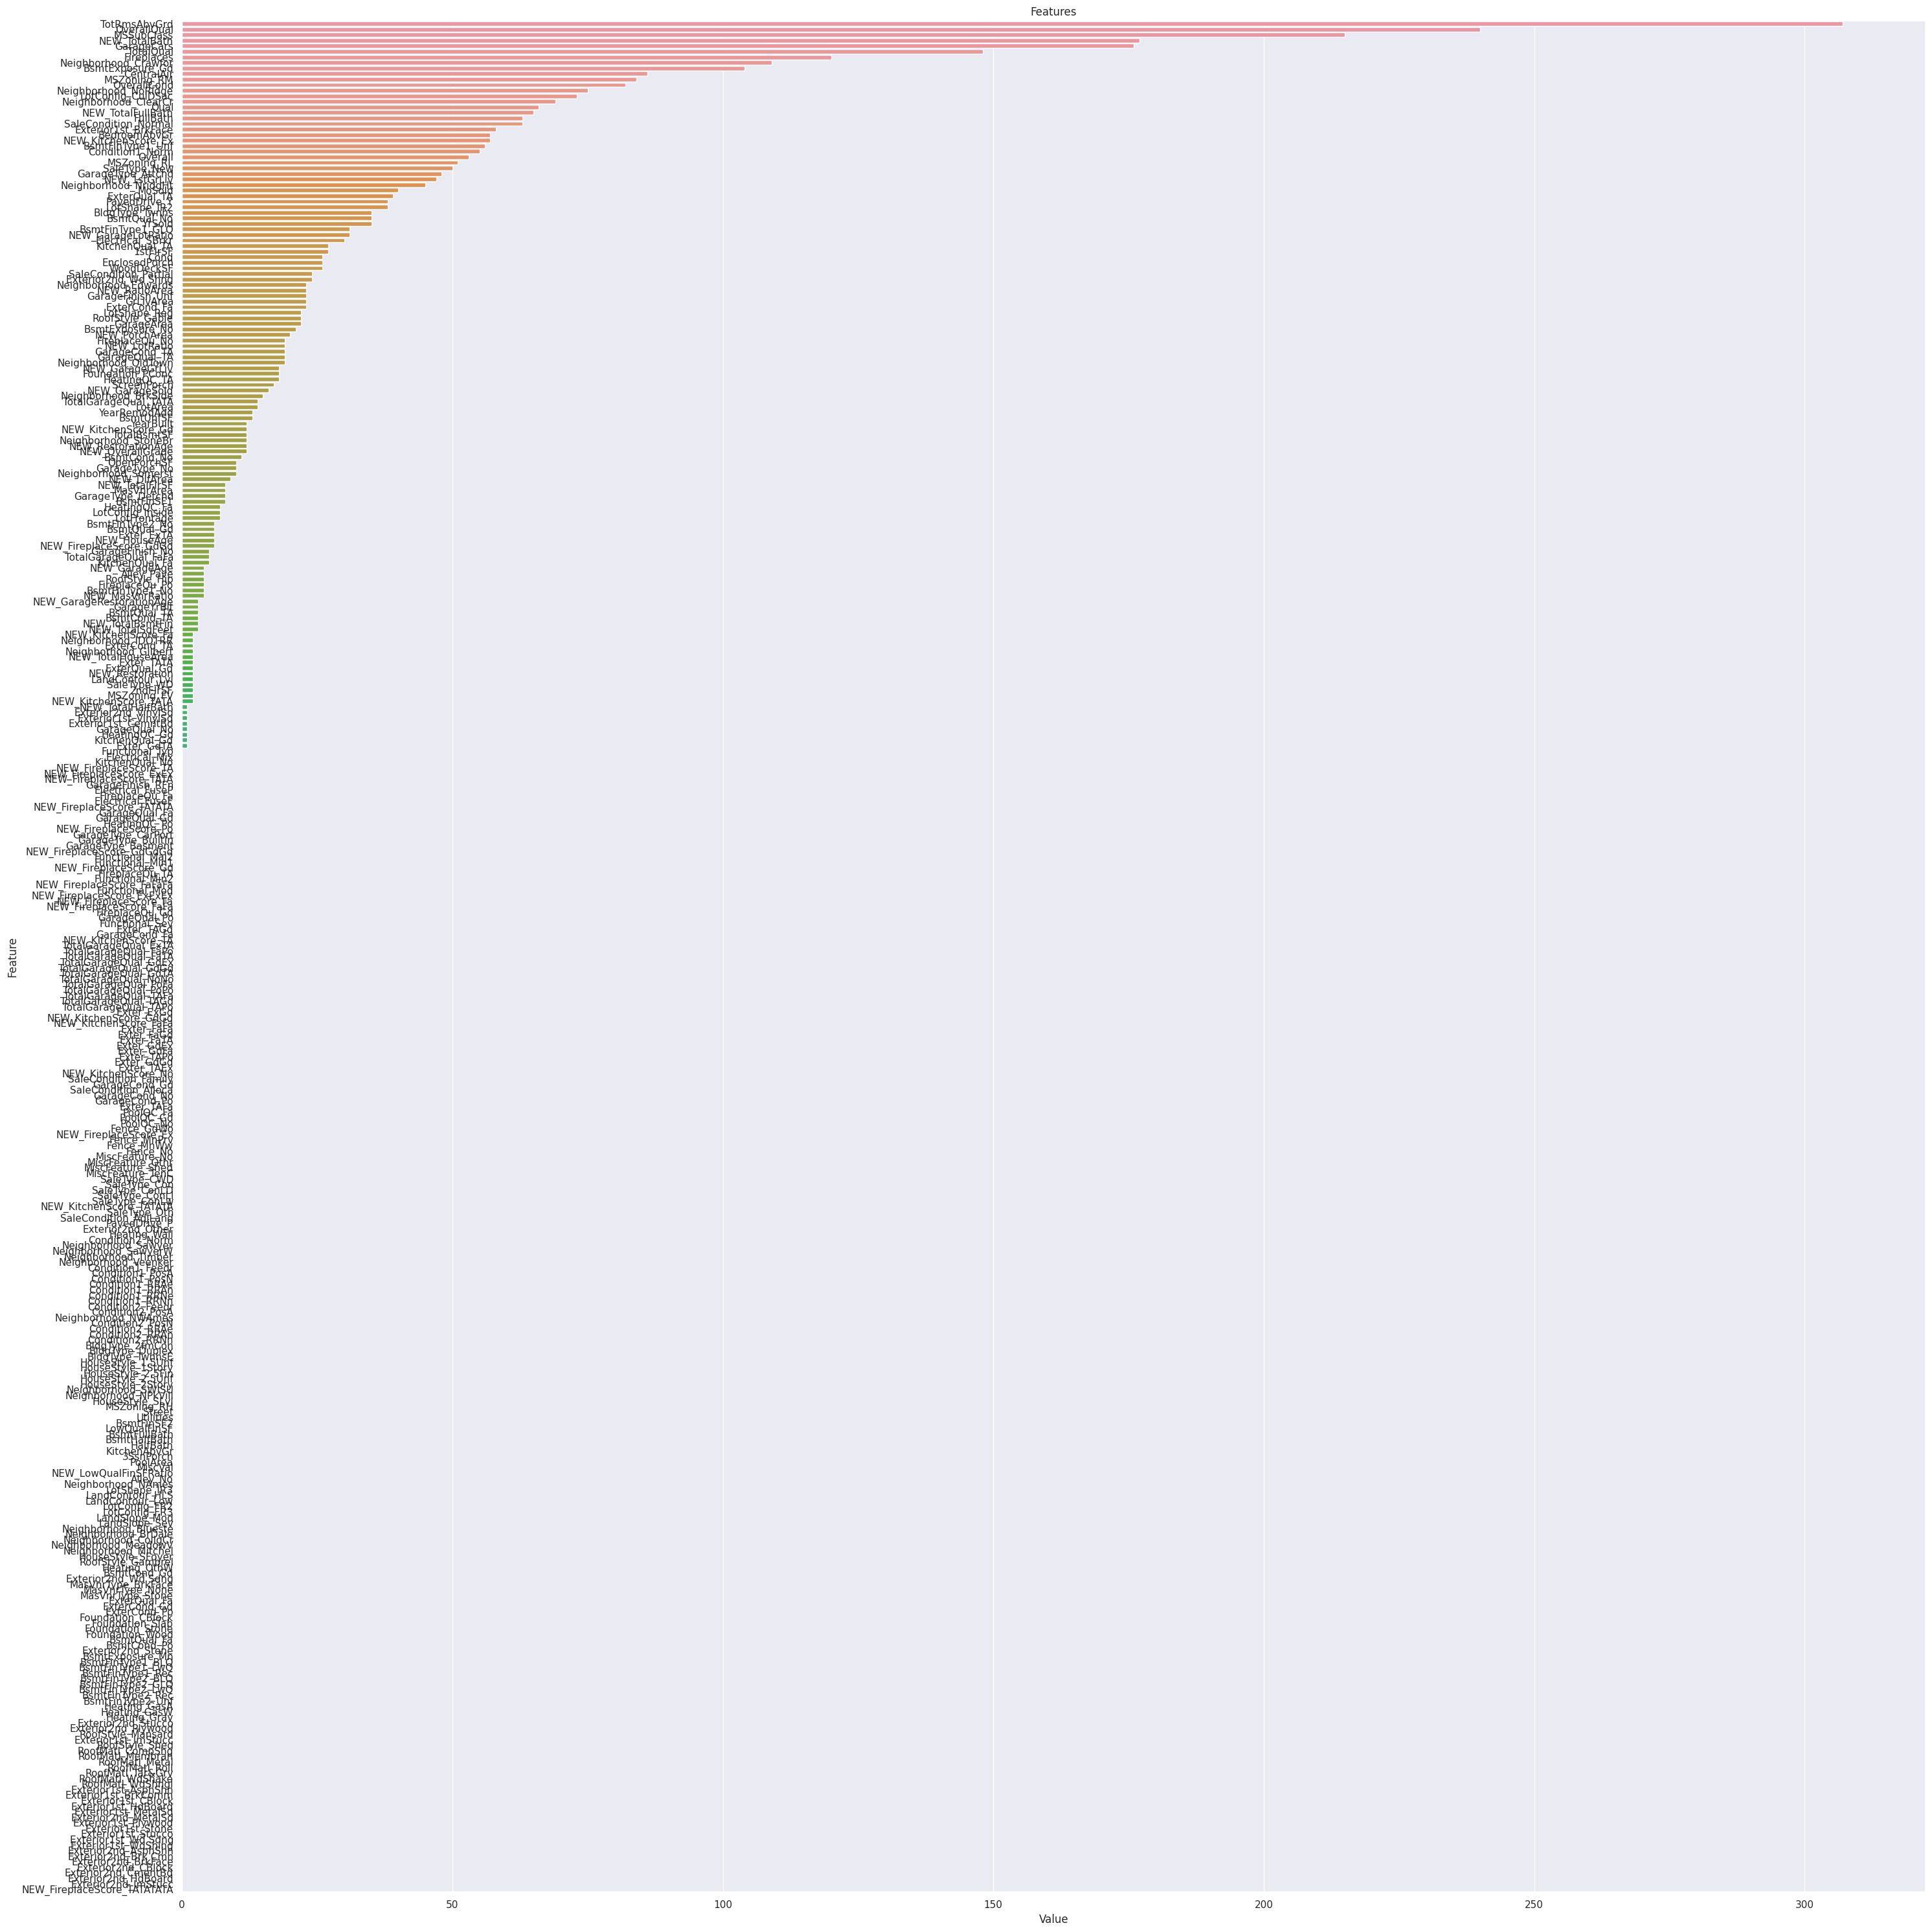

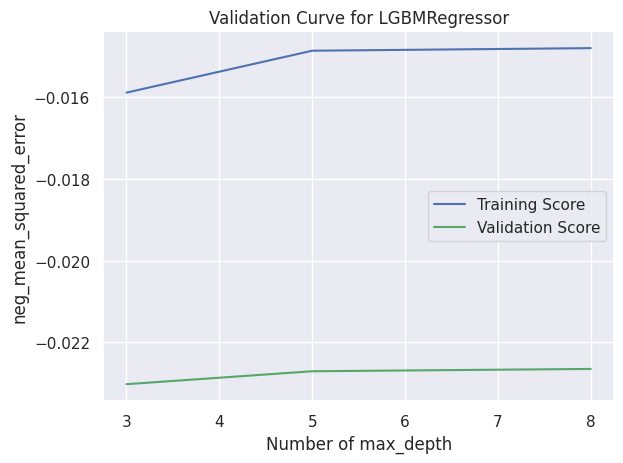

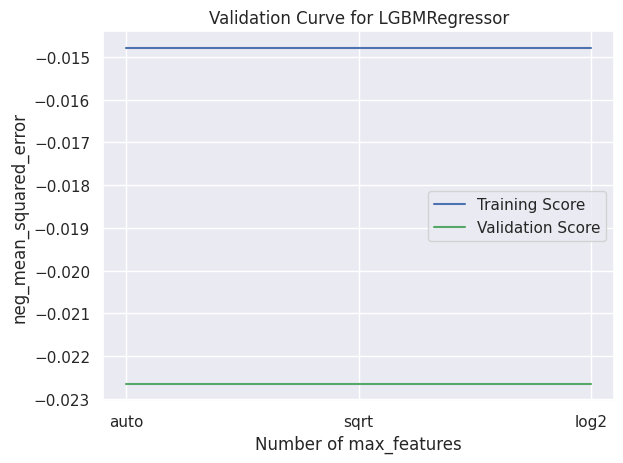

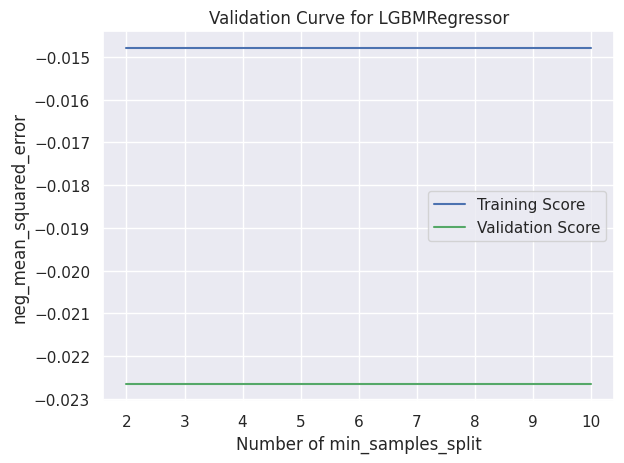

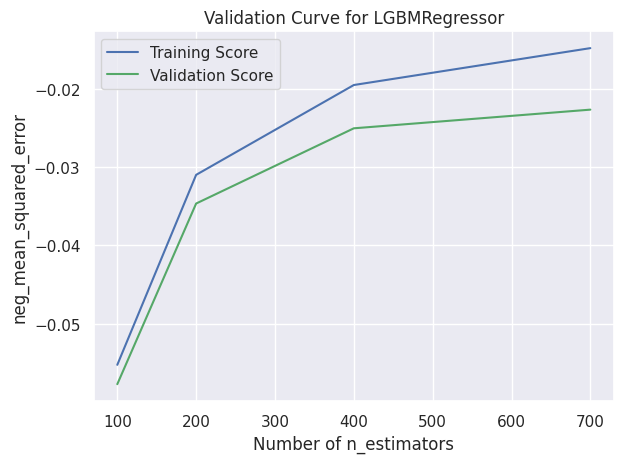

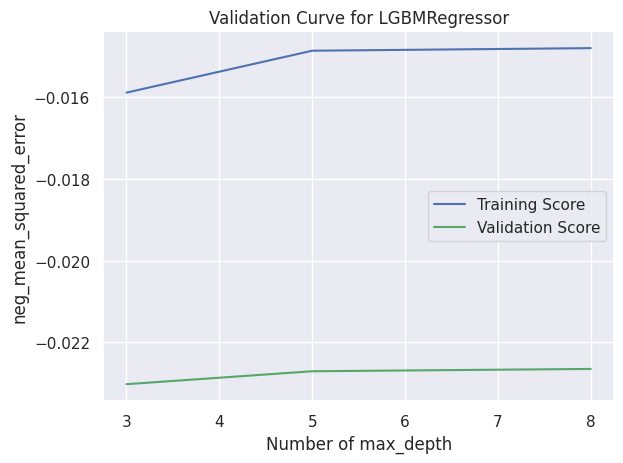

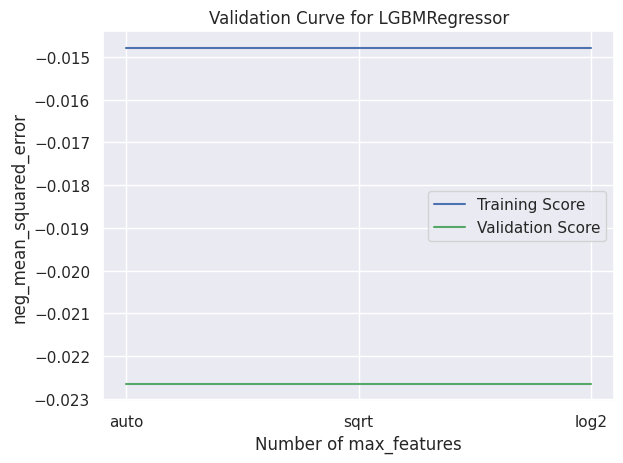

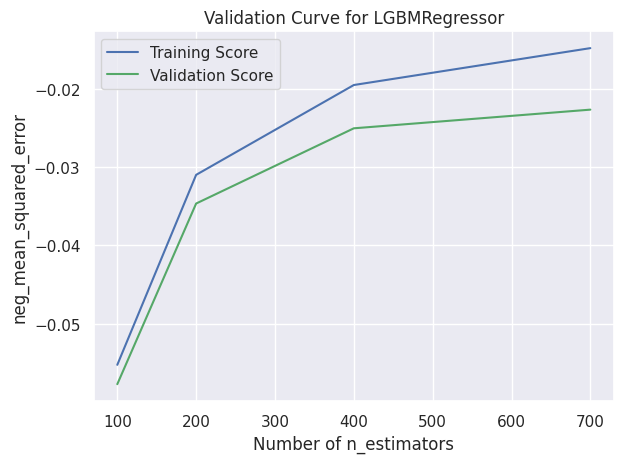

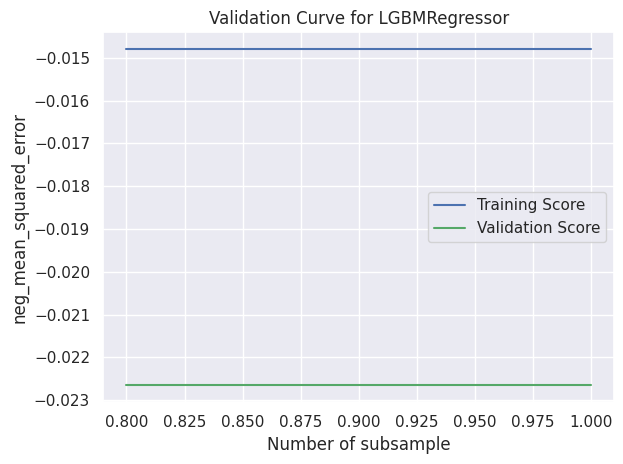

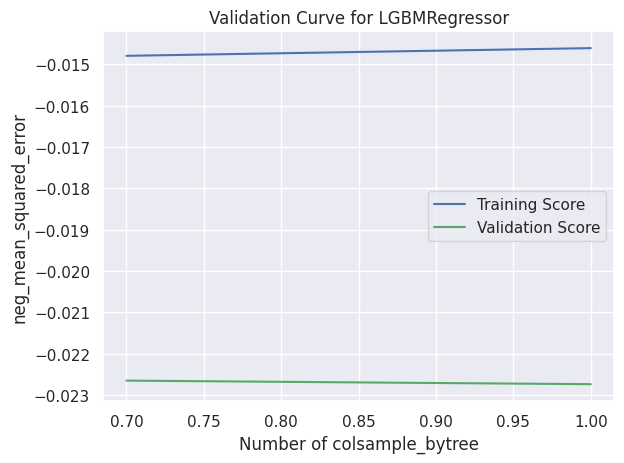

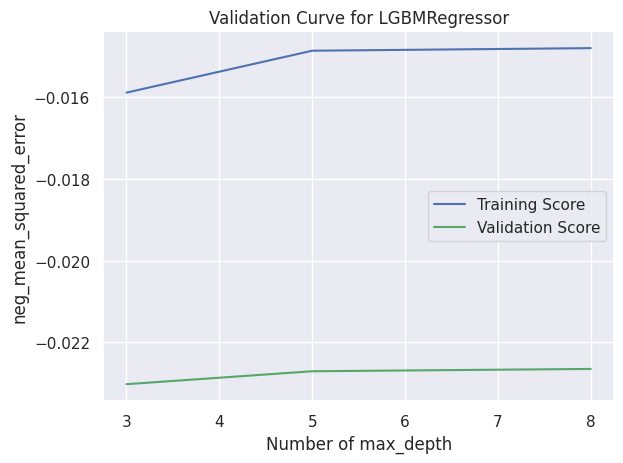

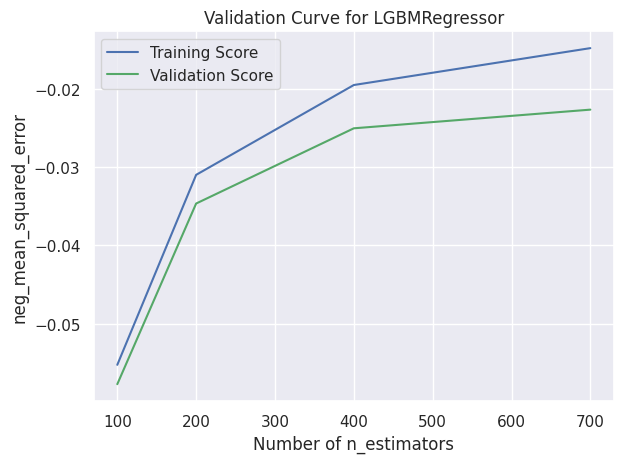

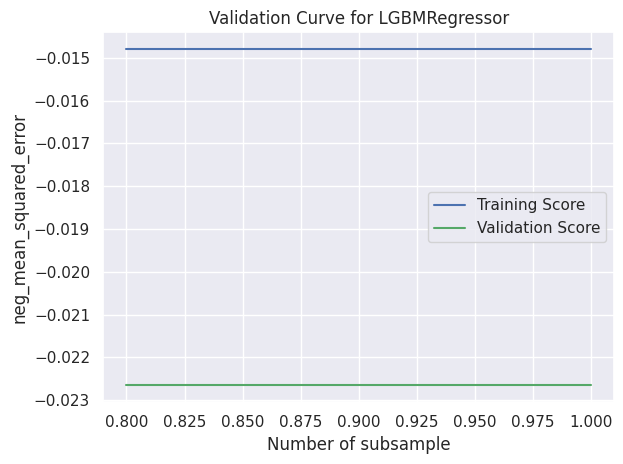

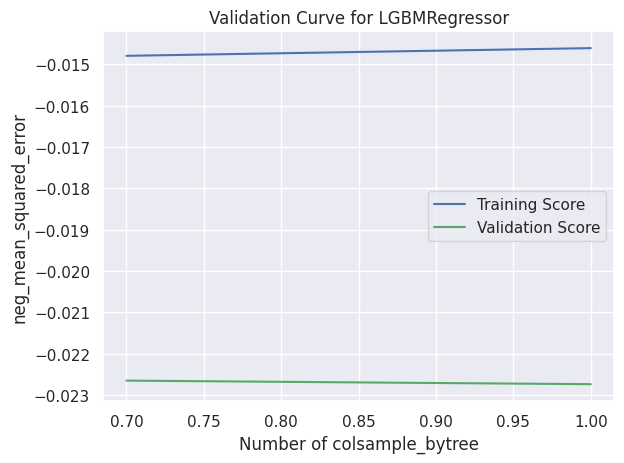

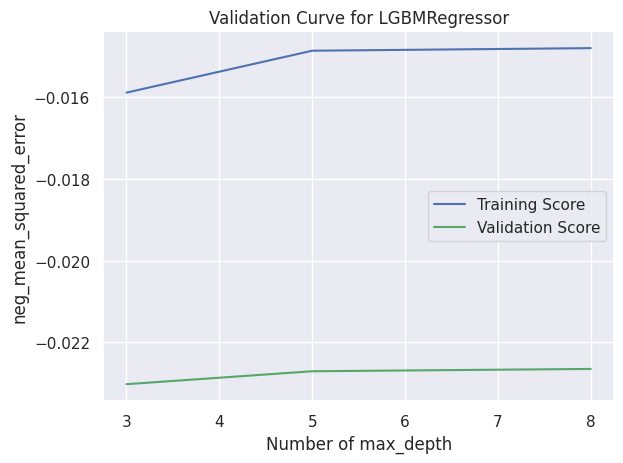

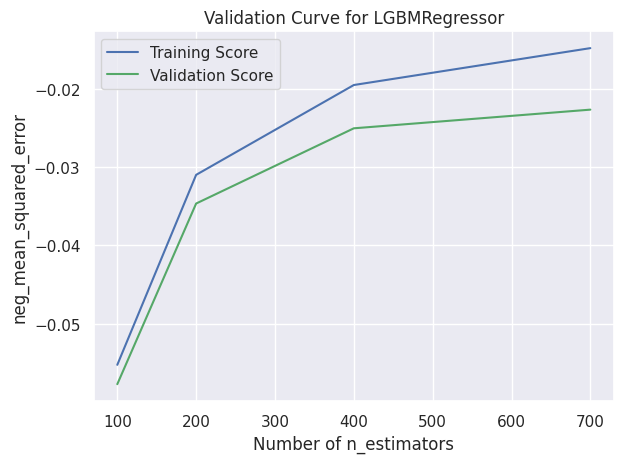

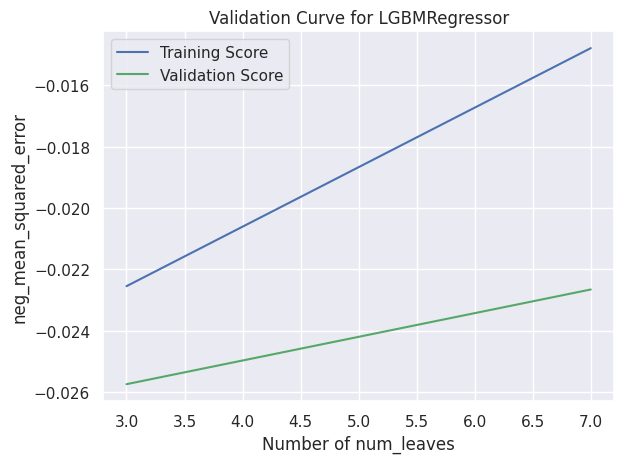

The model with the best score is GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='sqrt',
                          n_estimators=700, random_state=17, subsample=0.8)


In [ ]:
def hyper_info(models, params, X, y):

  results, gs_final, best_model = hyperparameter_tuning(models, params, X, y)
  results_df = pd.DataFrame(results).T

  plot_importance(gs_final, X)

  for model_name, model_params in params.items():
    for param_name, param_range in model_params.items():
      val_curve_params(gs_final, X, y, param_name, param_range)

  print(f"The model with the best score is {best_model}")

  return results_df, gs_final

results_df, model = hyper_info(models, params, X, y)

In [ ]:
results_df

,Best Parameters,RMSE
RandomForest,"{'max_depth': 8, 'max_features': 'auto', 'min_...",0.17014
GradientBoosting,"{'learning_rate': 0.01, 'max_depth': 5, 'max_f...",0.14981
XGBoost,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.15510
LightGBM,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.15214


#Testing Model on Test Data

In [ ]:
submission_df = pd.DataFrame()
submission_df['Id'] = test_df["Id"]

y_pred = model.predict(test_df.drop("Id", axis=1))

y_pred = np.expm1(y_pred)

submission_df['SalePrice'] = y_pred

submission_df.to_csv("/content/sample_submission.csv", index=False)

submission_df

,Id,SalePrice
1460,1488.00000,119162.33887
1461,1489.00000,141903.87292
1462,1490.00000,166164.52296
1463,1491.00000,181200.50934
1464,1492.00000,195400.40284
1465,1493.00000,173107.73326
1466,1494.00000,176743.77141
1467,1495.00000,170265.72759
1468,1496.00000,205379.01089
1469,1497.00000,122109.52528
